### Start by importing some packages needed for the analysis and modeling

In [128]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

### importing the data to be used (csv format)

In [129]:
# data to be used for training containing the target variable
train_data = pd.read_csv("C:\\Users\\D\\Downloads\\train.csv")
# data (without the target variable) to predicted
test_data=pd.read_csv("C:\\Users\\D\\Downloads\\test.csv")

In [130]:
# putting all the data(both test and train data) together in another dataframe
all_data = pd.concat([train_data,test_data], sort=True).reset_index(drop=True)
#putting all the data(both test and train data) together 
#to form a list for easy manipulation of the data
train_test_data=[train_data,test_data]

In [131]:
train_data.sample(5)# to look through a sample of the train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C


In [132]:
test_data.sample(5)# to look through a sample of the test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
166,1058,1,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C
282,1174,3,"Fleming, Miss. Honora",female,NaN,0,0,364859,7.7500,NaN,Q
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
235,1127,3,"Vendel, Mr. Olof Edvin",male,20.0,0,0,350416,7.8542,NaN,S


In [133]:
print("shape of train data is {}".format(train_data.shape))#to view the shape of the data
train_data.isna().sum()# to view the empty rows in the data 

shape of train data is (891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
print("shape of test data is {}".format(test_data.shape))#to view the shape of the data
test_data.isna().sum()# to view the empty rows in the data 

shape of test data is (418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [135]:
train_data.describe()# to get a brief statistics of the numerical data in train data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
test_data.describe()#to get a brief statistics of the numerical data in train data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [137]:
all_data.dtypes #to check the data types of the variables.

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

### Checking the Relationship between the Features in the data

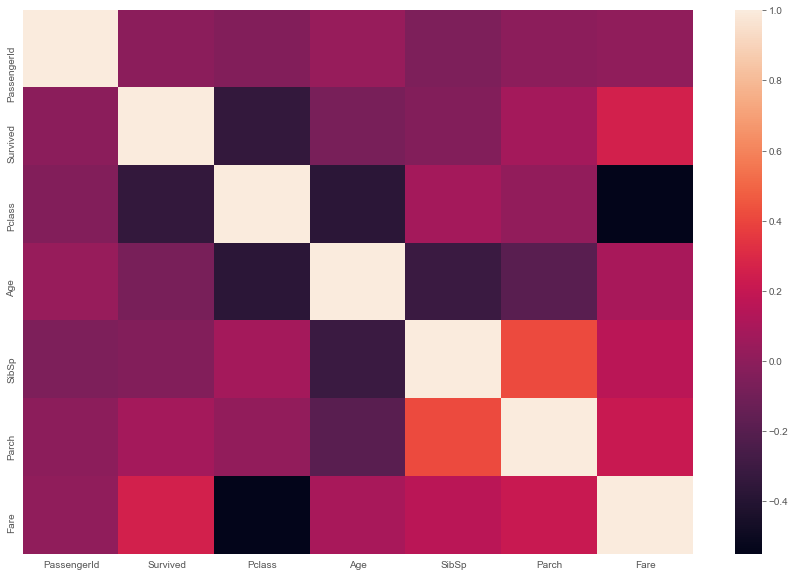

In [138]:
#view correlated values using a heat map
plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr())

heatmap shows that there is a  significant correlation between the Fare and survived, Sibsp and Parch. It also shows little correlation between Fare and age.  

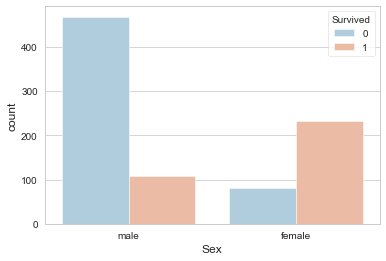

In [139]:
# plot showing survival by sex
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Survived',data=train_data,palette='RdBu_r')

In [140]:
#sns.set_style('whitegrid')
#sns.countplot(x='Cabin',hue='Survived',data=train_data,palette='RdBu_r')

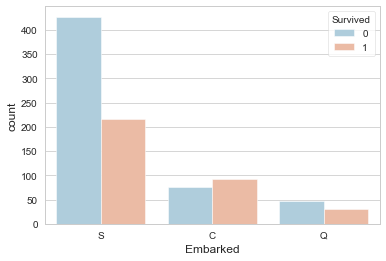

In [141]:
#plot showing survival by place they boarded from(embarked)
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue='Survived',data=train_data,palette='RdBu_r')

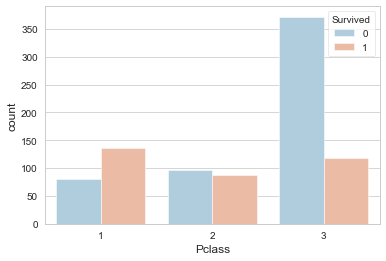

In [142]:
# plot showing survival by class on the ship
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train_data,palette='RdBu_r')

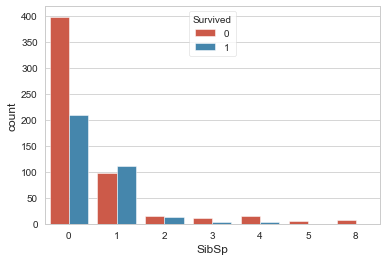

In [143]:
#plot showing survival by number of siblings and spouse a person has
sns.countplot(x='SibSp', hue='Survived',data=train_data)

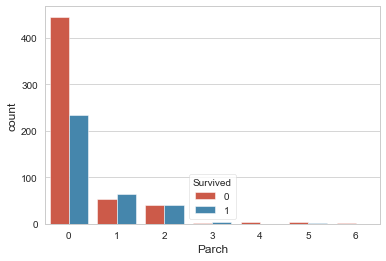

In [144]:
#plot showing survival by number of parents and children a person has.
sns.countplot(x='Parch', hue='Survived',data=train_data)

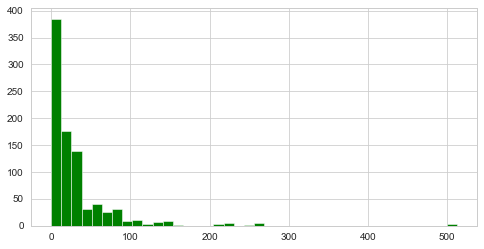

In [145]:
# a histogram visualizing the the fare variable in the train data
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

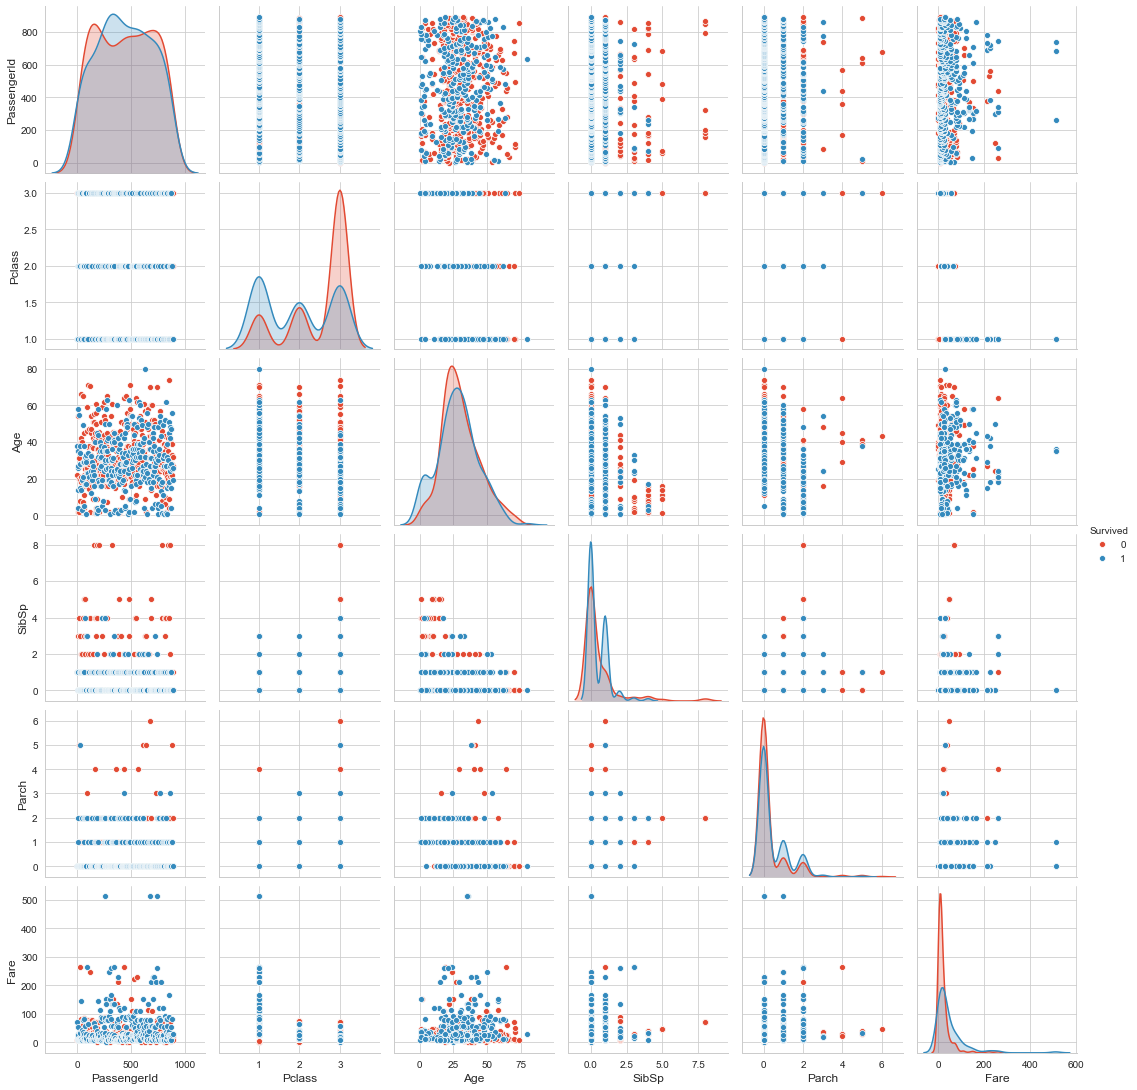

In [146]:
# pairplot showing the relationship between variables in the data in relation to survival.
sns.pairplot(train_data, hue="Survived")

#### conclusions from the visualization
1.Pclass:more people from 3rd class did not survive compared to 1st and 2nd class.
2.Age: Children below age 15 have higher probability of survival than adults.
3.Sibsp:People without siblings died more than people with siblings.
4.Parch:People without parents and children(ie alone) died more than people with children.
5.Fare: People who paid less died more than people who paid more.

# Filling in the missing variables

In [147]:
all_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Age, Cabin,Fare,Embarked are the missing variables 

In [148]:
# for Age we would fill it according to Sex and Pclass
all_data["Age"]=all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [149]:
# for the embarked column majority boarded from S=Southampton.
# so i am filling the Na values with S
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [150]:
# for fare, it should most likely depend on the Pclass(Passenger class)
all_data['Fare']= all_data.groupby(['Pclass'])['Fare'].apply(lambda x:x.fillna(x.median()))

In [151]:
all_data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

The only column still empty is the Cabin.
Since cabin would most likely depend on the class of the passenger which would determine Survival.
The first letter can be used to create a new feature.

### Feature Creation 

In [152]:
all_data['Deck'] = all_data['Cabin'].str[:1]
#creating a new feature called Deck from the cabin feature

In [153]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,NaN


In [154]:
all_data['Deck'].unique()# to view the unique values in the Deck column

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [155]:
all_data[all_data['Deck']== 'T']# to view the row with Deck T

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0.0,113784,T


In [156]:
# for the only passenger with deck of T,
#since he is a first class passenger we can convert it to a Deck A
ac =all_data[all_data['Deck']=='T'].index
all_data.loc[ac,'Deck']='A'

In [157]:
# the empty Deck cells are filled with'M'
all_data['Deck']=all_data['Deck'].fillna('M')

In [158]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


In [159]:
# replacing with more defined groups.
all_data['Deck']=all_data['Deck'].replace(['A','B','C'],'ABC')
all_data['Deck']=all_data['Deck'].replace(['D','E'],'DE')
all_data['Deck']=all_data['Deck'].replace(['F','G'],'FG')

In [160]:
# creating a new column familysize 
# since from the visualization it is evident there is a relationship betwwen sibsp, parch and survival
all_data['FamilySize']=all_data['SibSp'] + all_data['Parch']+1

In [161]:
all_data.head()# viewing the top 5 columns

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,FamilySize
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,1


In [162]:
# mapping the family size for a better model prediction
family_mapping={1:'Alone',2:'Small',3:'Small',4:'Small',5:'Medium',
                6:'Medium',7:'Large',8:'Large',9:'Large',10:'Large',11:'Large'}
all_data['GroupedFamilySize']=all_data['FamilySize'].map(family_mapping)

In [163]:
# creating a new column 'title' from the name column's titles
all_data['title']= all_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [164]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,FamilySize,GroupedFamilySize,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,2,Small,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,2,Small,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,1,Alone,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,2,Small,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,1,Alone,Mr


In [165]:
#Creating a new variable Is married from the title
title_mapping = {'Mr':0,'Miss':0,'Mrs':1,'Master':0,'Dr':0,'Rev':0,'Major':0,'Mlle':0,'Countess':0,
                 'Ms':0,'Lady':0,'Jonkheer':0,'Don':0,'Dona':0,'Mme':0,'Cpat':0,'Sir':0,'Col':0,'Capt':0}
all_data['Is_Married']=all_data['title'].map(title_mapping)

In [166]:
# Categorizing the diiferent titles into just 4 to make for better model prediction
all_data['title']=all_data['title'].replace(['Miss','Mrs','Ms','Mlle','Lady',
                                             'Mme','Countess','Dona'],'Miss\\Mrs\\Ms')
all_data['title']= all_data['title'].replace(['Dr','Col','Major','Jonkheer','Capt',
                                              'Sir','Don','Rev'],'Dr\\Military\\Noble\\Clergy')

In [167]:
all_data.isnull().sum()

Age                     0
Cabin                1014
Embarked                0
Fare                    0
Name                    0
Parch                   0
PassengerId             0
Pclass                  0
Sex                     0
SibSp                   0
Survived              418
Ticket                  0
Deck                    0
FamilySize              0
GroupedFamilySize       0
title                   0
Is_Married              0
dtype: int64

### Encoding Categorical Variables

In [168]:
# droping the cabin feature
all_data.drop(['Cabin'],inplace=True,axis=1)
# seperating the data frame back to test and train 
#since Label encoding would give an error with Nan values due to Survived column for the test column
df_train=all_data[0:891]
df_test=all_data[891:]
# removing the survive column in the test_data
df_test.drop(['Survived'],inplace=True,axis=1)
print(df_train.shape,df_test.shape)

(891, 16) (418, 15)


In [169]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,FamilySize,GroupedFamilySize,title,Is_Married
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,2,Small,Mr,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,2,Small,Miss\Mrs\Ms,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,1,Alone,Miss\Mrs\Ms,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,2,Small,Miss\Mrs\Ms,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,1,Alone,Mr,0


In [170]:
# Label encoder is used to convert categorical variables to numerical values
cat_cols = ['Sex','Embarked','Deck','title','GroupedFamilySize']
for feature in cat_cols:
    df_train[feature]=LabelEncoder().fit_transform(df_train[feature])

In [171]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,FamilySize,GroupedFamilySize,title,Is_Married
0,22.0,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,3,2,3,3,0
1,38.0,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,2,3,2,1
2,26.0,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,3,1,0,2,0
3,35.0,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,2,3,2,1
4,35.0,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,3,1,0,3,0


In [172]:
# label encoding for test data
for feature in cat_cols:
    df_test[feature]=LabelEncoder().fit_transform(df_test[feature])

In [173]:
# removing the survived column so when concating with the test data set there would be no nan
df_train2=df_train.drop(['Survived'], axis=1)
# concating test and train data to get all_data2
all_data2 = pd.concat([df_train2,df_test], sort=True).reset_index(drop=True)
all_data2.tail()

,Age,Deck,Embarked,FamilySize,Fare,GroupedFamilySize,Is_Married,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,title
1304,25.0,3,2,1,8.0500,0,0,"Spector, Mr. Woolf",0,1305,3,1,0,A.5. 3236,3
1305,39.0,0,0,1,108.9000,0,0,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,PC 17758,2
1306,38.5,3,2,1,7.2500,0,0,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,SOTON/O.Q. 3101262,3
1307,25.0,3,2,1,8.0500,0,0,"Ware, Mr. Frederick",0,1308,3,1,0,359309,3
1308,25.0,3,0,3,22.3583,3,0,"Peter, Master. Michael J",1,1309,3,1,1,2668,1


In [174]:
# one hot encoding the cat_features below.
cat_features =['Pclass','Sex','Deck','Embarked','title','GroupedFamilySize']
encoded_features=[]

for feature in cat_features:
    encoded_feat=OneHotEncoder().fit_transform(all_data2[feature].values.reshape(-1,1)).toarray()
    n=all_data[feature].nunique()
    cols=['{}_{}'.format(feature,n) for n in range(1,n+1)]
    print(cols)
    print(encoded_feat.shape)
    encoded_df=pd.DataFrame(encoded_feat,columns=cols)
    encoded_df.index= all_data2.index
    encoded_features.append(encoded_df)
all_data2=pd.concat([all_data2,*encoded_features], axis=1)

['Pclass_1', 'Pclass_2', 'Pclass_3']
(1309, 3)
['Sex_1', 'Sex_2']
(1309, 2)
['Deck_1', 'Deck_2', 'Deck_3', 'Deck_4']
(1309, 4)
['Embarked_1', 'Embarked_2', 'Embarked_3']
(1309, 3)
['title_1', 'title_2', 'title_3', 'title_4']
(1309, 4)
['GroupedFamilySize_1', 'GroupedFamilySize_2', 'GroupedFamilySize_3', 'GroupedFamilySize_4']
(1309, 4)


In [175]:
all_data2.shape# shape of the data after one hot encoding

(1309, 35)

In [176]:
# dividing the data after one hot encoding it into test and train data
df_train1=all_data2[0:891]
df_test1=all_data2[891:]
print(df_train1.shape,df_test1.shape)

(891, 35) (418, 35)


In [177]:
df_train1.head() # first few rows of the train data

,Age,Deck,Embarked,FamilySize,Fare,GroupedFamilySize,Is_Married,Name,Parch,PassengerId,...,Embarked_2,Embarked_3,title_1,title_2,title_3,title_4,GroupedFamilySize_1,GroupedFamilySize_2,GroupedFamilySize_3,GroupedFamilySize_4
0,22.0,3,2,2,7.2500,3,0,"Braund, Mr. Owen Harris",0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,38.0,0,0,2,71.2833,3,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26.0,3,2,1,7.9250,0,0,"Heikkinen, Miss. Laina",0,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,35.0,0,2,2,53.1000,3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,3,2,1,8.0500,0,0,"Allen, Mr. William Henry",0,5,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Scaling and Dropping features

In [178]:
# features to drop from the train and test data
# since some are alreday encoded and some are not needed to train the model
#like name and passengerid which is unique to each person
features_drop= ['Deck','Embarked','FamilySize',
                 'GroupedFamilySize' ,'Name','Parch','PassengerId', 'Pclass','Sex',
                'SibSp','Ticket','title',]

In [179]:
# droping the features in features_drop
clean_train_data= df_train1.drop(features_drop,axis=1)
clean_test_data= df_test1.drop(features_drop,axis=1)

In [180]:
clean_train_data.shape# shape after droping the features

(891, 23)

In [182]:
# Scaling the data both test and train data using Standard scaler
final_train= StandardScaler().fit_transform(clean_train_data)
final_test=StandardScaler().fit_transform(clean_test_data)

### Building a Model

In [183]:
# spliting the train data into  train and test with test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(final_train,df_train['Survived'],
                                                    test_size=0.30,random_state=101)

In [185]:
# Using the  Tuned RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_depth=7, max_features='auto',min_samples_leaf=6,
                       min_samples_split=6, n_estimators=1750, n_jobs=-1,oob_score=True, 
                       random_state=42, verbose=1)

In [186]:
# fitting the model
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:   11.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=1750, n_jobs=-1,
            oob_score=True, random_state=42, verbose=1, warm_start=False)

In [187]:
# predicting the splitted X_test
Predictions = rf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    1.3s finished


In [188]:
# calculating the Accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,Predictions)
accuracy

0.8022388059701493

In [189]:
# predicting the cleaned test data
Test_predictions=rf.predict(final_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    2.0s finished
